# Desafío Telecom X parte 2

## Objetivos del desafío
- Preparar los datos para el modelado (tratamiento, codificación, normalización).
- Realizar análisis de correlación y selección de variables.
- Entrenar dos o más modelos de clasificación.
- Evaluar el rendimiento de los modelos con métricas.
- Interpretar los resultados, incluyendo la importancia de las variables.
- Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

## Qué se pondrá en práctica
- Preprocesamiento de datos para Machine Learning
- Construcción y evaluación de modelos predictivos
- Interpretación de resultados y entrega de insights
- Comunicación técnica con enfoque estratégico

# Eliminación de columnas irrelevantes

In [743]:
import pandas as pd

In [744]:
datos = pd.read_csv('data/datos_tratados.csv')
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,PhoneService_bin,MultipleLines_bin,InternetService_bin,OnlineSecurity_bin,OnlineBackup_bin,DeviceProtection_bin,TechSupport_bin,StreamingTV_bin,StreamingMovies_bin,servicios_contratados
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,0,0,0,0,1,0,1,1,0,3
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,0,1,0,0,0,0,0,0,1,2
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,0,0,0,0,0,1,0,0,0,1
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,0,0,0,0,1,1,0,1,1,4
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,0,0,0,0,0,0,1,1,0,2


In [745]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customerID             7043 non-null   object 
 1   Churn                  7043 non-null   int64  
 2   gender                 7043 non-null   object 
 3   SeniorCitizen          7043 non-null   int64  
 4   Partner                7043 non-null   int64  
 5   Dependents             7043 non-null   int64  
 6   tenure                 7043 non-null   int64  
 7   PhoneService           7043 non-null   int64  
 8   MultipleLines          7043 non-null   object 
 9   InternetService        7043 non-null   object 
 10  OnlineSecurity         7043 non-null   object 
 11  OnlineBackup           7043 non-null   object 
 12  DeviceProtection       7043 non-null   object 
 13  TechSupport            7043 non-null   object 
 14  StreamingTV            7043 non-null   object 
 15  Stre

In [746]:
datos.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias,...,PhoneService_bin,MultipleLines_bin,InternetService_bin,OnlineSecurity_bin,OnlineBackup_bin,DeviceProtection_bin,TechSupport_bin,StreamingTV_bin,StreamingMovies_bin,servicios_contratados
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.0,7043.000000,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2279.734304,2.158675,...,0.0,0.421837,0.0,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,2.459747
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.794470,1.003088,...,0.0,0.493888,0.0,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,2.045539
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.610000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,398.550000,1.180000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1394.550000,2.340000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,2.990000,...,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.960000,...,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [747]:
datos.describe(include='O')

,customerID,gender,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,3,3,3,3,3,3,3,3,3,4
top,0002-ORFBO,Male,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check
freq,1,3555,3390,3096,3498,3088,3095,3473,2810,2785,3875,2365


In [748]:
datos = datos.drop(columns='customerID')
datos.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PhoneService_bin,MultipleLines_bin,InternetService_bin,OnlineSecurity_bin,OnlineBackup_bin,DeviceProtection_bin,TechSupport_bin,StreamingTV_bin,StreamingMovies_bin,servicios_contratados
0,0,Female,0,1,1,9,1,No,DSL,No,...,0,0,0,0,1,0,1,1,0,3
1,0,Male,0,0,0,9,1,Yes,DSL,No,...,0,1,0,0,0,0,0,0,1,2
2,1,Male,0,0,0,4,1,No,Fiber optic,No,...,0,0,0,0,0,1,0,0,0,1
3,1,Male,1,1,0,13,1,No,Fiber optic,No,...,0,0,0,0,1,1,0,1,1,4
4,1,Female,1,1,0,3,1,No,Fiber optic,No,...,0,0,0,0,0,0,1,1,0,2


# Encoding
> Transformación de variables categóricas a formato numérico

In [749]:
categoricas = [
    "gender",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaymentMethod",
]

datos_encoded = pd.get_dummies(data=datos, columns=categoricas, dtype=int)
datos_encoded.head()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,9,1,1,65.6,593.30,2.19,...,1,0,0,0,1,0,0,0,0,1
1,0,0,0,0,9,1,0,59.9,542.40,2.00,...,0,0,1,1,0,0,0,0,0,1
2,1,0,0,0,4,1,1,73.9,280.85,2.46,...,1,0,0,1,0,0,0,0,1,0
3,1,1,1,0,13,1,1,98.0,1237.85,3.27,...,0,0,1,1,0,0,0,0,1,0
4,1,1,1,0,3,1,1,83.9,267.40,2.80,...,1,0,0,1,0,0,0,0,0,1


# Verificar Proporción de Cancelación (Churn)

In [750]:
datos_encoded['Churn'].value_counts(normalize=True)*100

Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64

<p style='color: #E2E2E2; background-color: #1C0F13; padding: 24px'>A través del método anterior se puede observar que hay un gran desbalance en las clases analizadas. Se cree que esto podría impactar en los modelos predictivos</p>

# Análisis de correlación

In [751]:
corr = datos_encoded.corr()
corr['Churn'].sort_values(ascending=False)*100

Churn                                      100.000000
Contract_Month-to-month                     40.510291
OnlineSecurity_No                           34.263680
TechSupport_No                              33.728073
InternetService_Fiber optic                 30.801974
PaymentMethod_Electronic check              30.191875
OnlineBackup_No                             26.800518
DeviceProtection_No                         25.248136
Cuentas_Diarias                             19.341174
Charges.Monthly                             19.335642
PaperlessBilling                            19.182533
SeniorCitizen                               15.088933
StreamingMovies_No                          13.084503
StreamingTV_No                              12.891588
StreamingTV_Yes                              6.322775
StreamingTV_bin                              6.322775
StreamingMovies_bin                          6.138155
StreamingMovies_Yes                          6.138155
MultipleLines_bin           

In [752]:
corr["Churn"].sort_values(ascending=True) * 100

tenure                                     -35.222867
Contract_Two year                          -30.225347
StreamingMovies_No internet service        -22.789045
InternetService_No                         -22.789045
OnlineSecurity_No internet service         -22.789045
StreamingTV_No internet service            -22.789045
OnlineBackup_No internet service           -22.789045
TechSupport_No internet service            -22.789045
DeviceProtection_No internet service       -22.789045
Charges.Total                              -19.832426
Contract_One year                          -17.782002
OnlineSecurity_bin                         -17.122629
OnlineSecurity_Yes                         -17.122629
TechSupport_Yes                            -16.467356
TechSupport_bin                            -16.467356
Dependents                                 -16.422140
Partner                                    -15.044754
PaymentMethod_Credit card (automatic)      -13.430175
InternetService_DSL         

In [753]:
seleccionadas = [
    'Churn',
    "Contract_Month-to-month",
    "OnlineSecurity_No",
    "TechSupport_No",
    "InternetService_Fiber optic",
    "PaymentMethod_Electronic check",
    "OnlineBackup_No",
    "DeviceProtection_No",
]

Las siguientes variables son candidatas para ser usadas en el modelo predictivo por su fuerte correlación con la cancelación (Churn), todas mayores al 25%:
- Contract_Month-to-month 40.51%
- OnlineSecurity_No 34.26%
- TechSupport_No 33.72%
- InternetService_Fiber optic 30.80%
- PaymentMethod_Electronic check 30.19
- OnlineBackup_No 26.80%
- DeviceProtection_No 25.24%

# Análisis dirigido de correlación

### Tiempo de contrato: `tenure`

In [754]:
datos_encoded[['Churn', 'tenure']].corr()

,Churn,tenure
Churn,1.000000,-0.352229
tenure,-0.352229,1.000000


In [755]:
import plotly.express as px
import matplotlib.pyplot as plt

In [756]:
fig = px.box(datos_encoded, x='Churn', y='tenure')

fig.show()

### Gasto total: `Charges.Total`

In [757]:
datos_encoded[["Churn", "Charges.Total"]].corr()

,Churn,Charges.Total
Churn,1.000000,-0.198324
Charges.Total,-0.198324,1.000000


In [758]:
fig = px.box(datos_encoded, x="Churn", y="Charges.Total")

fig.show()

En ambos casos se observa que hay una correlación negativa, más fuerte en la variable de tiempo de contratación.

Esto podría llegar a tener un sentido lógico.

# Separación de datos

In [759]:
# Selección de columnas con fuerte correlación
df = datos_encoded[seleccionadas]
df.head()

,Churn,Contract_Month-to-month,OnlineSecurity_No,TechSupport_No,InternetService_Fiber optic,PaymentMethod_Electronic check,OnlineBackup_No,DeviceProtection_No
0,0,0,1,0,0,0,0,1
1,0,1,1,1,0,0,1,1
2,1,1,1,1,1,1,1,0
3,1,1,1,1,1,1,0,0
4,1,1,1,0,1,0,1,1


In [760]:
y = df['Churn'] # variable respuesta
X = df.drop(columns='Churn') # variables explicativas

## Balanceo de clases

In [761]:
# from imblearn.over_sampling import SMOTE

# oversampling = SMOTE()

# x_balanceada, y_balanceada = oversampling.fit_resample(X, y)
# y_balanceada.value_counts(normalize=True)

In [762]:
from sklearn.model_selection import train_test_split

# Creando variables de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)

# Creación de modelos

### Baseline model

In [763]:
from sklearn.dummy import DummyRegressor

baseline = DummyRegressor()

baseline.fit(X_train, y_train)

DummyRegressor()

In [764]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score

In [765]:
# Función que muestra puntaje en diferentes métricas
def calcular_regresion(y_test, y_pred):
    rmse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metricas = {
        "RMSE": round(rmse ** (1 / 2), 4),
        "MAE": round(mae, 4),
        "R2": round(r2, 4),
    }
    return metricas

In [766]:
baseline.score(X_test, y_test)

-0.0005906703608165031

In [767]:
y_pred_dummy = baseline.predict(X_test)
baseline_score = calcular_regresion(y_test, y_pred_dummy)
baseline_score

{'RMSE': 0.4376, 'MAE': 0.3879, 'R2': -0.0006}

### DecisionTree Model

In [768]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=5, random_state=16)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=16)

In [769]:
tree.score(X_test, y_test)

0.7709417889256981

In [770]:
y_pred_tree = tree.predict(X_test)
tree_score = calcular_regresion(y_test, y_pred_tree)
tree_score

{'RMSE': 0.4786, 'MAE': 0.2291, 'R2': -0.1967}

### RandomForest Model

In [771]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth=5, random_state=16)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

forest_score = calcular_regresion(y_test, y_pred_forest)
forest_score

{'RMSE': 0.463, 'MAE': 0.2144, 'R2': -0.1201}

# Evaluando Modelos

In [772]:
from sklearn.model_selection import train_test_split

# Separando entrenamiento + validación de prueba
X, X_test, y, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=16
)

# Validacion, size default 25%
X_train, X_val, y_train, y_val = train_test_split(
    X, y, stratify=y, random_state=16
)

La precisión del modelo es: 0.5743801652892562
La sensibilidad (Recall) del modelo es: 0.5
La exactitud (Accuracy) del modelo es: 0.7690839694656488
El F1-score del modelo es: 0.5346153846153846


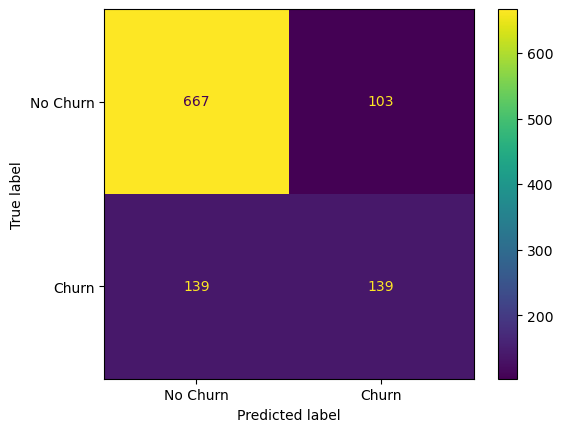

In [773]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Tree Model
X, X_test, y, y_test = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=16
)

# validacion
# ** test size por defecto es 0.25
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=16)

modelo = DecisionTreeClassifier(max_depth=5, random_state=16)
modelo.fit(X_train, y_train)
y_previsto = modelo.predict(X_val)

matriz_confusion = confusion_matrix(y_val, y_previsto)

print(f"La precisión del modelo es: {precision_score(y_val, y_previsto)}")
print(f"La sensibilidad (Recall) del modelo es: {recall_score(y_val, y_previsto)}")
print(f"La exactitud (Accuracy) del modelo es: {accuracy_score(y_val, y_previsto)}")
print(f"El F1-score del modelo es: {f1_score(y_val, y_previsto)}")

visualizacion = ConfusionMatrixDisplay(
    matriz_confusion, display_labels=["No Churn", "Churn"]
)

visualizacion.plot();

La precisión del modelo es: 0.6057142857142858
La sensibilidad (Recall) del modelo es: 0.4491525423728814
La exactitud (Accuracy) del modelo es: 0.77665544332211
El F1-score del modelo es: 0.5158150851581509


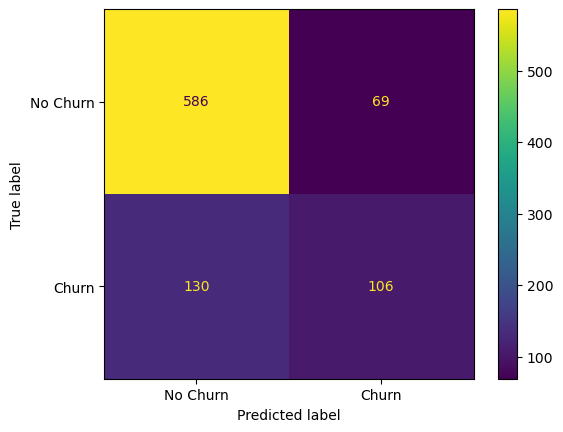

In [774]:
from sklearn.ensemble import RandomForestClassifier

# FOREST Model
X, X_test, y, y_test = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=16
)

# validacion
# ** test size por defecto es 0.25
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=16)

modelo = RandomForestClassifier(max_depth=5, random_state=16)
modelo.fit(X_train, y_train)
y_previsto = modelo.predict(X_val)

matriz_confusion = confusion_matrix(y_val, y_previsto)

print(f"La precisión del modelo es: {precision_score(y_val, y_previsto)}")
print(f"La sensibilidad (Recall) del modelo es: {recall_score(y_val, y_previsto)}")
print(f"La exactitud (Accuracy) del modelo es: {accuracy_score(y_val, y_previsto)}")
print(f"El F1-score del modelo es: {f1_score(y_val, y_previsto)}")

visualizacion = ConfusionMatrixDisplay(matriz_confusion, display_labels=['No Churn', 'Churn'])
visualizacion.plot()

#### Resultados modelo Árbol de decisiones
- La precisión del modelo es: 0.5743801652892562
- La sensibilidad (Recall) del modelo es: 0.5
- La exactitud (Accuracy) del modelo es: 0.7690839694656488
- El F1-score del modelo es: 0.5346153846153846

#### Resultado modelo Random Forest
- La precisión del modelo es: 0.6057142857142858
- La sensibilidad (Recall) del modelo es: 0.4491525423728814
- La exactitud (Accuracy) del modelo es: 0.77665544332211
- El F1-score del modelo es: 0.5158150851581509

El desempeño de ambos modelo pareciera no ser muy distinto. Random Forest tiene mejores resultados con las métricas de precisión y exactitud, mientras que el árbol de decisiones lo supera en las restantes sensibilidad y F1.

Es importante notar que para evaluar estos modelos se usó la clase Churn desbalanceada, por lo que será mejor evaluarlos teniendo esto en cuenta.

Bajo este criterio, quizás sea práctico utilizar la métrica F1-score, que proporciona un equilibrio entre recall y precisión para casos en que las clases de la variable objetivo están desbalanceadas.

# Validación cruzada: comprobando overfitting o underfitting

In [775]:
from sklearn.model_selection import KFold, cross_validate

kf = KFold(n_splits=5, shuffle=True, random_state=16)

cv_resultados_tree = cross_validate(tree, X, y, cv=kf)

cv_resultados_forest = cross_validate(forest, X, y, cv=kf)
cv_resultados_forest

{'fit_time': array([0.10903907, 0.07050395, 0.07092476, 0.07163739, 0.07581592]),
 'score_time': array([0.00532317, 0.00512791, 0.00490594, 0.00532103, 0.005126  ]),
 'test_score': array([0.75736325, 0.78511236, 0.78370787, 0.76685393, 0.78089888])}

In [776]:
def show_cv_metrics(test_score):
    promedio = test_score.mean()
    desvio_std = test_score.std()

    return f"El intervalo de confianza es: [{promedio - 2*desvio_std}, {min(promedio+2*desvio_std,1)}]"

In [777]:
show_cv_metrics(cv_resultados_tree['test_score'])

'El intervalo de confianza es: [0.7425668468519457, 0.7929674519645757]'

In [778]:
show_cv_metrics(cv_resultados_forest["test_score"])

'El intervalo de confianza es: [0.7530604002835117, 0.7965141147424113]'

In [779]:
metricas = ["accuracy", "recall", "precision", "f1"]
# Puntaje TREE
for metrica in metricas:
    print(f"Puntaje: {metrica}")
    cv_resultados = cross_validate(tree, X, y, cv=kf, scoring=metrica)
    print(show_cv_metrics(cv_resultados_tree["test_score"]))

Puntaje: accuracy
El intervalo de confianza es: [0.7425668468519457, 0.7929674519645757]
Puntaje: recall
El intervalo de confianza es: [0.7425668468519457, 0.7929674519645757]
Puntaje: precision
El intervalo de confianza es: [0.7425668468519457, 0.7929674519645757]
Puntaje: f1
El intervalo de confianza es: [0.7425668468519457, 0.7929674519645757]


In [780]:
# Puntaje FOREST
for metrica in metricas:
    print(f"Puntaje: {metrica}")
    cv_resultados = cross_validate(forest, X, y, cv=kf, scoring=metrica)
    print(show_cv_metrics(cv_resultados_forest["test_score"]))

Puntaje: accuracy
El intervalo de confianza es: [0.7530604002835117, 0.7965141147424113]
Puntaje: recall
El intervalo de confianza es: [0.7530604002835117, 0.7965141147424113]
Puntaje: precision
El intervalo de confianza es: [0.7530604002835117, 0.7965141147424113]
Puntaje: f1
El intervalo de confianza es: [0.7530604002835117, 0.7965141147424113]


In [781]:
from sklearn.model_selection import StratifiedKFold

In [783]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados_forest = cross_validate(forest, X, y, cv=skf, scoring="recall")

show_cv_metrics(cv_resultados_forest["test_score"])

'El intervalo de confianza es: [0.3597883597883597, 0.5291005291005291]'